## Logistic Regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), or logit regression, or is a regression model where the outcome variable is categorical. Often this is used when the variable is binary (e.g. yes/no, survived/dead, pass/fail, etc.)

Logistic regression measures the relationship between the categorical response variable and one or more predictor variables by estimating probabilities. 




In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

#  the number of hours each student spent studying, and whether they passed (1) or failed (0).
url = 'http://nikbearbrown.com/YouTube/MachineLearning/DATA/Hours_vs_Pass_Exam.csv'
hours_pass = pd.read_csv(url)
hours_pass.head()

/Users/bear/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/bear/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


### Probability of passing an exam versus hours of study  

Suppose we wish to answer the following question:

_A group of 20 students spend between 0 and 6 hours studying for an exam. How does the number of hours spent studying affect the probability that the student will pass the exam?_

Note that the dependent variable pass/fail represented by "1" and "0" are categorical. A standard linear regression line of the form $y = \beta_0 + \beta_1 x + \varepsilon$ doesn't fit the data well.

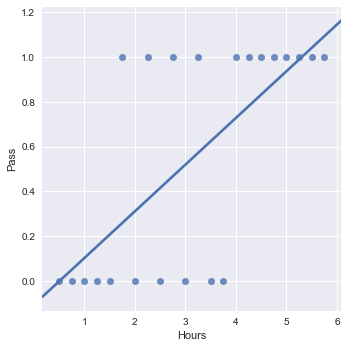

In [2]:
sns.lmplot(x='Hours', y='Pass', data=hours_pass, ci=None)

The reason for using logistic regression for this problem is that the
dependent variable pass/fail represented by “1” and “0” are not
cardinal numbers. If the problem was changed so that pass/fail was
replaced with the grade 0–100 (cardinal numbers), then simple
regression analysis could be used.

The table shows the number of hours each student spent studying, and
whether they passed (1) or failed (0).

| Hours |0.50|0.75|1.00|1.25|1.50|1.75|2.00|2.25|2.50|2.75|3.00|3.25|3.50|4.00|4.25|4.50|4.75|5.00|5.50|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| Pass | 0  |  0 |  0 |  0 | 0  |  1 |  0 |  1 |  0 |  1 | 0  | 1  | 0  | 1  | 1  |   1|  1 |  1 |  1 |


The graph shows the probability of passing the exam versus the number of
hours studying, with the logistic regression curve fitted to the data.

![Graph of a logistic regression curve showing probability of passing an
exam versus hours studying](http://nikbearbrown.com/YouTube/MachineLearning/IMG/Exam_pass_logistic_curve.jpg)


The logistic regression analysis gives the following output.


|   | Coefficient  | Std.Error  | z-value  | P-value (Wald)  |
|-----------|-----------|-----------|-----------|-----------|
|Intercept   | −4.0777  | 1.7610  | −2.316  | 0.0206  |
| Hours   | 1.5046   | 0.6287  | 2.393   | 0.0167  |



The output indicates that hours studying is significantly associated
with the probability of passing the exam ($p = 0.0167$, [Wald test](https://en.wikipedia.org/wiki/Wald_test)).
The output also provides the coefficients for
$\text{Intercept} = - 4.0777$ and $\text{Hours} = 1.5046$. These
coefficients are entered in the logistic regression equation to estimate
the probability of passing the exam:

$\text{Probability of passing exam} = \frac{1}{1 + \text{exp} \left( - \left( 1.5046 \cdot \text{Hours} - 4.0777 \right) \right) }$

For example, for a student who studies 2 hours, entering the value
$\text{Hours} = 2$ in the equation gives the estimated probability of
passing the exam of 0.26:

$\text{Probability of passing exam} = \frac{1}{1 + \text{exp}\left( - \left( 1.5046 \cdot 2 - 4.0777 \right) \right) } = 0.26$

Similarly, for a student who studies 4 hours, the estimated probability
of passing the exam is 0.87:

$\text{Probability of passing exam} = \frac{1}{1 + \text{exp}\left( - \left( 1.5046 \cdot 4 -  4.0777 \right) \right) } = 0.87$

This table shows the probability of passing the exam for several values
of hours studying.

| Hours of study  | Probability of passing exam  |
|----------------|-----------------------------|
| 1  | 0.07  |
| 2  | 0.26  |
| 3  | 0.61  |
| 4  | 0.87  |
| 5  | 0.97  |


The **Wald test** is a parametric statistical test named after the
Hungarian statistician Abraham Wald. Whenever a relationship within
or between data items can be expressed as a statistical model with
parameters to be estimated from a sample, the Wald test can be used to
test the true value of the parameter based on the sample estimate.

Suppose an economist, who has data on social class and shoe size,
wonders whether social class is associated with shoe size. Say $\theta$
is the average increase in shoe size for upper-class people compared to
middle-class people: then the Wald test can be used to test whether
$\theta$ is 0 (in which case social class has no association with shoe
size) or non-zero (shoe size varies between social classes). Here,
$\theta$, the hypothetical difference in shoe sizes between upper and
middle-class people in the whole population, is a parameter. An estimate
of $\theta$ might be the difference in shoe size between upper and
middle-class people in the sample. In the Wald test, the economist uses
the estimate and an estimate of variability (see below) to draw
conclusions about the unobserved true $\theta$. Or, for a medical
example, suppose smoking multiplies the risk of lung cancer by some
number *R*: then the Wald test can be used to test whether *R* = 1 (i.e.
there is no effect of smoking) or is greater (or less) than 1 (i.e.
smoking alters risk).

A Wald test can be used in a great variety of different models including
models for [dichotomous] variables and models for [continuous
variables].

Mathematical details
--------------------

Under the Wald statistical test, the [maximum likelihood](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) estimate
$\hat\theta$ of the parameter(s) of interest $\theta$ is compared with
the proposed value $\theta_0$, with the assumption that the difference
between the two will be approximately normally distributed. Typically
the square of the difference is compared to a [chi-squared
distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution).

### Test on a single parameter

In the univariate case, the Wald statistic is

$$\frac{ ( \widehat{ \theta}-\theta_0 )^2 }{\operatorname{var}(\hat \theta )}$$

which is compared against a [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution).

Alternatively, the difference can be compared to a normal
distribution. In this case the test statistic is

$$\frac{\widehat{\theta}-\theta_0}{\operatorname{se}(\hat\theta)}$$

where $\operatorname{se}(\widehat\theta)$ is the [standard error](https://en.wikipedia.org/wiki/Standard_error) of the
maximum likelihood estimate (MLE). A reasonable estimate of the standard
error for the MLE can be given by <math> \\frac



## Logistic function (S-curve)

A *[logistic function](https://en.wikipedia.org/wiki/Logistic_function)* or *logistic curve* is a common "S" shape curve, with equation:

$$f(x) = \frac{1}{1 + \mathrm e^{-x}} $$ 

$$f(x) = \frac{L}{1 + \mathrm e^{-k(x-x_0)}} $$

where  

* $e$ = the natural logarithm base $e$ (also known as $e$ or Euler's number),   
* $x_0$ = the $x$-value of the sigmoid's midpoint,    
* $L$ = the curve's maximum value, and     
* $k$ = the steepness of the curve.    

For values of $x$ in the range of real number's from $-\infty$ to $\infty$, the S-curve shown on the right is obtained (with the graph of $f$ approaching $L$ as $x$ approaches $\infty$ and approaching zero as $x$ approaches $-\infty$).

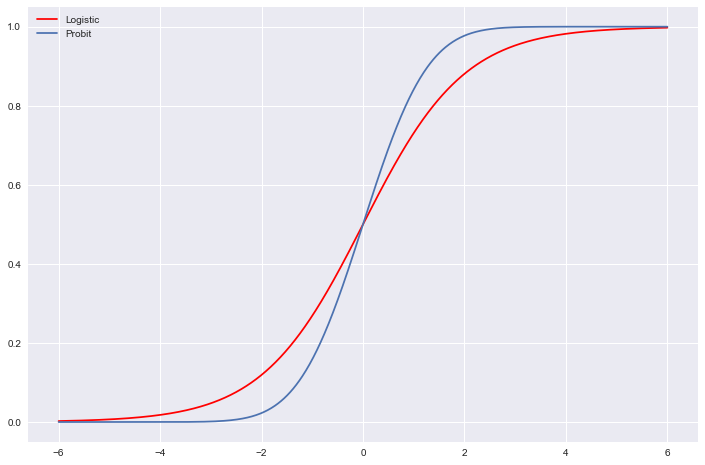

In [3]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
ax.legend();

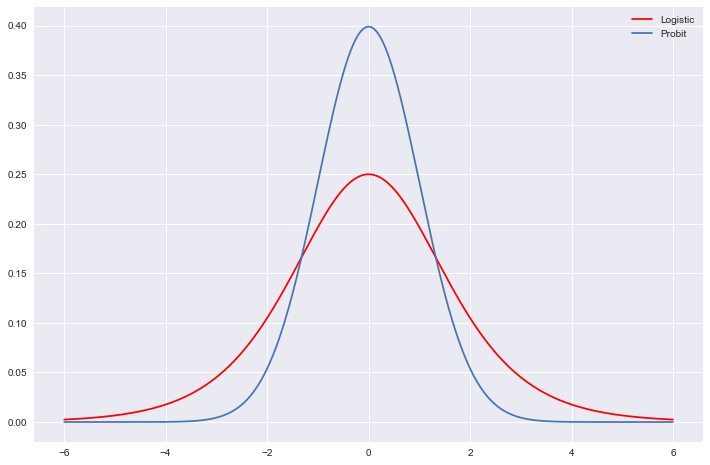

In [4]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.pdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.pdf(support), label='Probit')
ax.legend();

### Logistic Regression

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x + \varepsilon_i$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\ln \left({p\over 1-p}\right) = \beta_0 + \beta_1x + \varepsilon_i$$

This is called the **logit function**.

Probability is sometimes written as $\pi$:

$$\ln \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x + \varepsilon_i$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

In [5]:
# Adding intercept manually
hours_pass['intercept'] = 1.0
hours_pass.head()

,Hours,Pass,intercept
0,0.50,0,1.0
1,0.75,0,1.0
2,1.00,0,1.0
3,1.25,0,1.0
4,1.50,0,1.0


In [6]:
pred=['Hours','intercept']
pred

['Hours', 'intercept']

In [7]:
hours_pass_model = sm.Logit(hours_pass['Pass'], hours_pass[pred]).fit()
hours_pass_model.summary()
#hours_pass_model=logreg.fit(hours_pass['Hours'], hours_pass['Pass'])
#hours_pass_model.coef_

Optimization terminated successfully.
         Current function value: 0.427818
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   22
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Sep 2017   Pseudo R-squ.:                  0.3791
Time:                        00:06:12   Log-Likelihood:                -9.4120
converged:                       True   LL-Null:                       -15.158
                                        LLR p-value:                 0.0006988
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Hours          1.2455      0.496      2.512      0.012       0.274       2.217
intercept     -3.5595      1.558     -2.285      0.022      -6.613      -0.506
==============================================================================
"""

### coefficients of the model

Overview of the coefficients of the model, how well those coefficients fit, the overall fit quality, and several other statistical measures.

### confidence interval

LogitResults.conf_int(alpha=0.05, cols=None, method='default')
_Returns the confidence interval of the fitted parameters._

Parameters:	
alpha : float, optional
_The significance level for the confidence interval. ie., The default alpha = .05 returns a 95% confidence interval._


In [8]:
hours_pass_model.conf_int()

,0,1
Hours,0.273569,2.217351
intercept,-6.612844,-0.506063


In [9]:
hours_pass_model.conf_int(alpha=0.01)

,0,1
Hours,-0.031821,2.522741
intercept,-7.572289,0.453382


### odds ratio

Take the exponential of each of the coefficients to generate the odds ratios. This tells you how a 1 unit increase or decrease in a variable affects the odds of being admitted.

In [10]:
np.exp(hours_pass_model.params)

Hours        3.474532
intercept    0.028454
dtype: float64

In [11]:
# odds ratios and 95% CI
params = hours_pass_model.params
conf = hours_pass_model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
Hours,1.314648,9.182970,3.474532
intercept,0.001343,0.602865,0.028454


## UCLA Admissions Data   

Variable | Description | Type of Variable
---| ---| ---
Admit| 0 = not admitted 1 = admitted | categorical
GRE | GRE score 200-800 | continuous 
GPA | GPA 0-4.0 | continuous
Prestige | 1= not prestigious 2 = low prestige 3= good prestige 4= high prestige | categorical


## Admission into grad school?

Determine if there is an association between graduate school admission and the prestige of a student's undergraduate school using data from the UCLA admissions data set.

Outcome: admission into grad school.    

Predictors/covariates: Prestige, GRE, GPA    




In [12]:
ucla = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
ucla.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [13]:
ucla.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [14]:
ucla.std()

admit      0.466087
gre      115.516536
gpa        0.380567
rank       0.944460
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fa3e320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fd95f60>]], dtype=object)

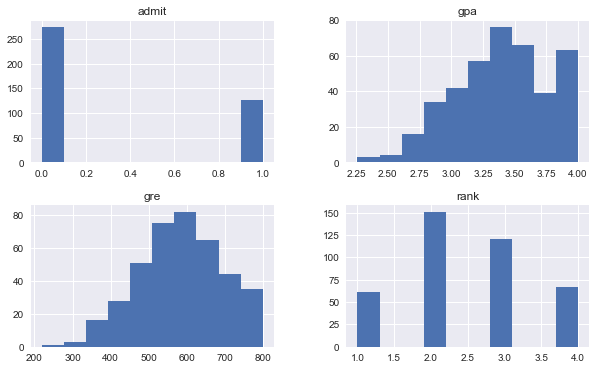

In [15]:
ucla.hist()

In [16]:
#  Tabulating whether or not someone was admitted by rank
pd.crosstab(ucla['admit'], ucla['rank'], rownames=['admit'])

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


## Dummy variables

In statistics and econometrics, particularly in regression analysis, a [dummy variable](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)) (also known as an indicator variable, design variable, Boolean indicator, categorical variable, binary variable, or qualitative variable) is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome. Dummy variables are used as devices to sort data into mutually exclusive categories (such as smoker/non-smoker, etc.). For example, in econometric time series analysis, dummy variables may be used to indicate the occurrence of wars or major strikes. A dummy variable can thus be thought of as a truth value represented as a numerical value 0 or 1 (as is sometimes done in computer programming).

---------------------------------

![Graph showing wage = α~0~ + δ~0~female + α~1~education +
*U*, δ~0~ &lt; 0.](http://nikbearbrown.com/YouTube/MachineLearning/IMG/Graph_showing_Wage_female_education.jpg)

Dummy variables are incorporated in the same way as quantitative
variables are included (as explanatory variables) in regression models.
For example, if we consider a [Mincer-type] regression model of wage
determination, wherein wages are dependent on gender (qualitative) and
years of education (quantitative):

$$\ln \text{wage} = \alpha_{0} + \delta_{0} \text{female} + \alpha_{1} \text{education} + u$$

where $u \sim N(0, \sigma^{2})$ is the [error term]. In the model,
*female* = 1 when the person is a female and *female* = 0 when the
person is male. $\delta_{0}$ can be interpreted as: the difference in
wages between females and males, holding education constant. Thus, δ~0~
helps to determine whether there is a discrimination in wages between
males and females. For example, if δ~0~&gt;0 (positive coefficient),
then women earn a higher wage than men (keeping other factors constant).
Note that the coefficients attached to the dummy variables are called
**differential intercept coefficients**. The model can be depicted
graphically as an intercept shift between females and males. In the
figure, the case δ~0~&lt;0 is shown (wherein, men earn a higher wage
than women).[^1]

Dummy variables may be extended to more complex cases. For example,
seasonal effects may be captured by creating dummy variables for each of
the seasons: $D_{1} = 1$ if the observation is for summer, and equals
zero otherwise; $D_{2}=1$ if and only if autumn, otherwise equals zero;
$D_{3}=1$ if and only if winter, otherwise equals zero; and $D_{4}=1$ if
and only if spring, otherwise equals zero. In the [panel data], [fixed
effects estimator] dummies are created for each of the units in
[cross-sectional data] (e.g. firms or countries) or periods in a [pooled
time-series]. However in such regressions either the [constant term] has
to be removed or one of the dummies has to be removed, with its
associated category becoming the base category against which the others
are assessed in order to avoid the **dummy variable trap**:

The constant term in all regression equations is a coefficient
multiplied by a regressor equal to one. When the regression is expressed
as a matrix equation, the matrix of regressors then consists of a column
of ones (the constant term), vectors of zeros and ones

In [17]:
dummy_ranks = pd.get_dummies(ucla['rank'], prefix='rank')
dummy_ranks.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [18]:
keep = ['admit', 'gre', 'gpa']
ucla_dummy = ucla[keep].join(dummy_ranks.ix[:, 'rank_2':])
ucla_dummy.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


### Interpreting the Intercept in a Regression Model

$$\ln \left({p\over 1-p}\right) = \beta_0 + \beta_1x + \beta_2x + \beta_3x + \beta_4x .... + \varepsilon_i$$


The intercept $\beta_0$ is the expected mean value when all $\beta_ix = 0$.

In [19]:
# Adding intercept manually
ucla_dummy['intercept'] = 1.0
ucla_dummy.head()

,admit,gre,gpa,rank_2,rank_3,rank_4,intercept
0,0,380,3.61,0,1,0,1.0
1,1,660,3.67,0,1,0,1.0
2,1,800,4.00,0,0,0,1.0
3,1,640,3.19,0,0,1,1.0
4,0,520,2.93,0,0,1,1.0


In [20]:
pred = ucla_dummy.columns[1:]
pred

Index(['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4', 'intercept'], dtype='object')

In [21]:
ucla_model = sm.Logit(ucla_dummy['admit'], ucla_dummy[pred]).fit()
ucla_model.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 20 Sep 2017   Pseudo R-squ.:                 0.08292
Time:                        00:06:13   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
rank_2        -0.6754      0.316     -2.134      0.033      -1.296      -0.055
rank_3        -1.3402      0.345     -3.881      0.000      -2.017      -0.663
rank_4        -1.5515      0.418     -3.713      0.000      -2.370      -0.733
intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
==============================================================================
"""

The output shows the coefficients, their standard errors, the z-statistic (i.e. Wald z-statistic), and the associated p-values. Both gre and gpa are statistically significant, as are the three terms for rank. The logistic regression coefficients give the change in the log odds of the outcome for a one unit increase in the predictor variable.


_gre is statistically significant_ (At .05 significance level, P>|z| < .05)

For every one unit change in gre, the log odds of admission (versus non-admission) increases by 0.0023.

_gpa is statistically significant_ At .05 significance level, P>|z| < .05)

For a one unit increase in gpa, the log odds of being admitted to graduate school increases by 0.8040.

The indicator variables for rank have a slightly different interpretation. The three terms for rank are statistically significant at .05 significance level, P>|z| < .05.

1= not prestigious 2 = low prestige 3= good prestige 4= high prestige

The indicator variables for rank have a slightly different interpretation. 

For example, attending an undergraduate institution with rank of 2, versus an institution with a rank of 1, changes the log odds of admission by -0.6754. Attending an undergraduate institution with rank of 4, versus an institution with a rank of 1, changes the log odds of admission by -1.5515.


In [22]:
ucla_model.conf_int()

,0,1
gre,0.000120,0.004409
gpa,0.153684,1.454391
rank_2,-1.295751,-0.055135
rank_3,-2.016992,-0.663416
rank_4,-2.370399,-0.732529
intercept,-6.224242,-1.755716


In [23]:
np.exp(ucla_model.params)

gre          1.002267
gpa          2.234545
rank_2       0.508931
rank_3       0.261792
rank_4       0.211938
intercept    0.018500
dtype: float64

In [24]:
params = ucla_model.params
conf = ucla_model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddRatio']
np.exp(conf)

,2.5%,97.5%,OddRatio
gre,1.000120,1.004418,1.002267
gpa,1.166122,4.281877,2.234545
rank_2,0.273692,0.946358,0.508931
rank_3,0.133055,0.515089,0.261792
rank_4,0.093443,0.480692,0.211938
intercept,0.001981,0.172783,0.018500


## Breast Cancer Wisconsin (Diagnostic) Data Set

In the project we'll be using the _Breast Cancer Wisconsin (Diagnostic) Data Set_ to predict whether the cancer is benign or malignant. 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This data set is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

This data set is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

In [25]:
field_names_df = pd.read_table('http://nikbearbrown.com/YouTube/MachineLearning/DATA/wpbc_data_field_names.txt',header=None)
field_names=field_names_df[0].tolist()
field_names

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [26]:
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None,names = field_names)
breast_cancer.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
#data formating ID is a non-informative column
breast_cancer = breast_cancer.drop("ID", 1)
breast_cancer.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
breast_cancer.groupby('diagnosis').count()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [29]:
breast_cancer.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [30]:
breast_cancer.groupby('diagnosis').median()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540,...,13.35,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712
M,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575,...,20.59,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760


In [31]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
breast_cancer_scaled = scaled_df(breast_cancer)

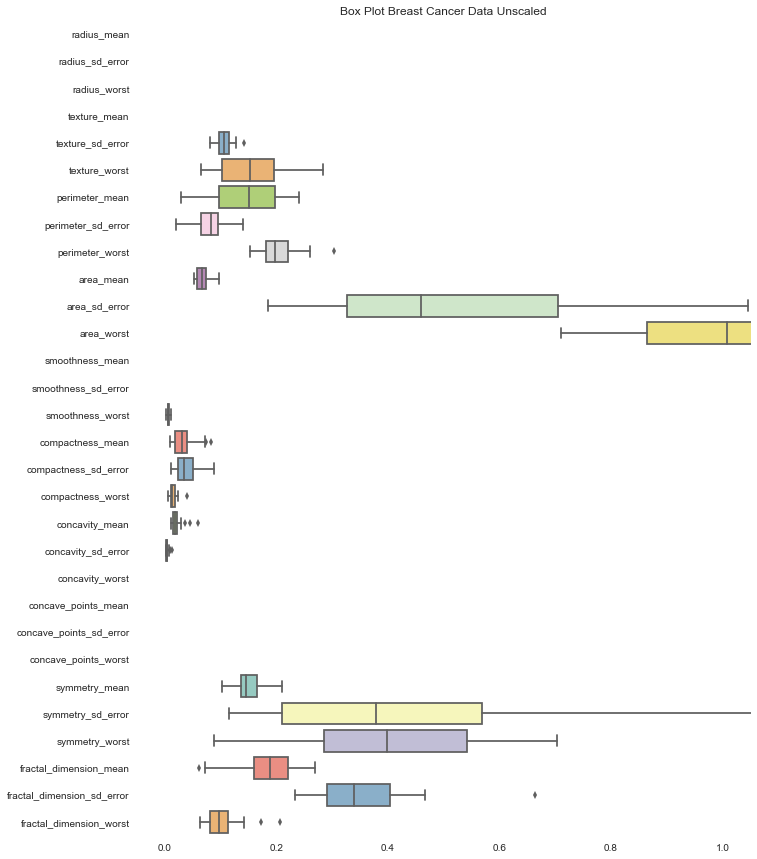

In [32]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Breast Cancer Data Unscaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breast_cancer[1:29], 
  orient = 'h', 
  palette = 'Set3')

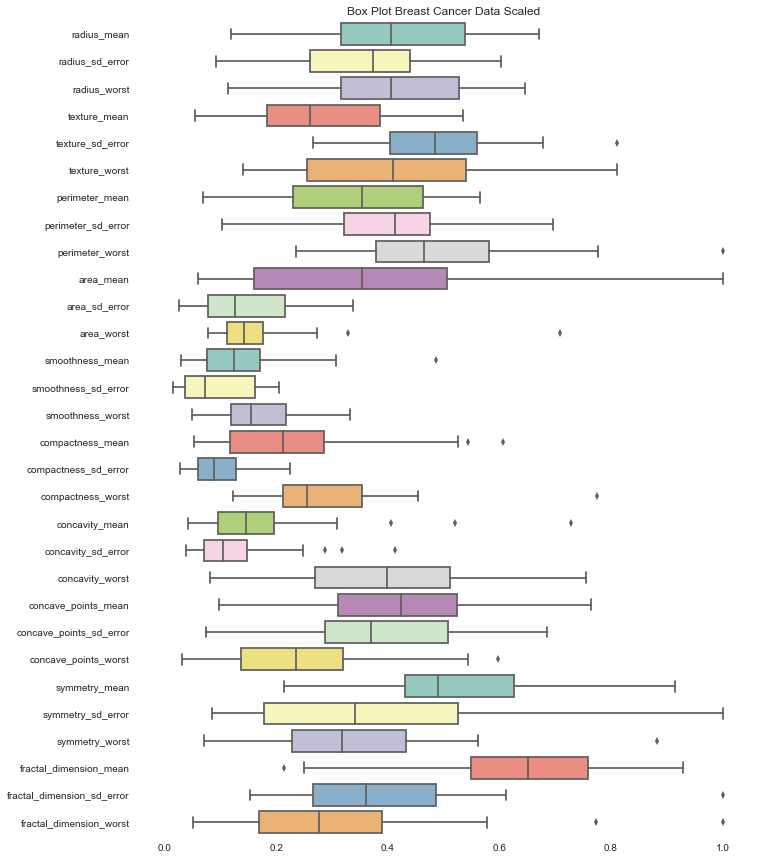

In [33]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#FFFFFF')
plt.title("Box Plot Breast Cancer Data Scaled")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breast_cancer_scaled[1:29], 
  orient = 'h', 
  palette = 'Set3')

In [34]:
predictor_names=field_names_df[0].tolist()
predictor_names=predictor_names[2:]
predictor_names

['radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [35]:
def rank_predictors(dat,l,f='diagnosis'):
    rank={}
    max_vals=dat.max()
    median_vals=dat.groupby(f).median()  # We are using the median as the mean is sensitive to outliers
    for p in l:
        score=np.abs((median_vals[p]['B']-median_vals[p]['M'])/max_vals[p])
        rank[p]=score
    return rank
cat_rank=rank_predictors(breast_cancer,predictor_names) 
cat_rank

{'area_mean': 0.00035919540229885377,
 'area_sd_error': 0.10083536373129133,
 'area_worst': 0.0011258955987717171,
 'compactness_mean': 0.090694239290989687,
 'compactness_sd_error': 0.047285353535353548,
 'compactness_worst': 0.097442697480583443,
 'concave_points_mean': 0.12363746467501009,
 'concave_points_sd_error': 0.203343949044586,
 'concave_points_worst': 0.17762106252938412,
 'concavity_mean': 0.017606079797340073,
 'concavity_sd_error': 0.031216487935656838,
 'concavity_worst': 0.20088790233074363,
 'fractal_dimension_mean': 0.37006872852233669,
 'fractal_dimension_sd_error': 0.062669478758662286,
 'fractal_dimension_worst': 0.050506024096385493,
 'perimeter_mean': 0.26771321462043107,
 'perimeter_sd_error': 0.31232604373757455,
 'perimeter_worst': 0.060855263157894794,
 'radius_mean': 0.18231945926716484,
 'radius_sd_error': 0.10361507128309573,
 'radius_worst': 0.19108753315649865,
 'smoothness_mean': 0.083189262966333027,
 'smoothness_sd_error': 0.071606418295831795,
 'smo

In [36]:
cat_rank=sorted(cat_rank.items(), key=lambda x: x[1])
cat_rank

[('area_mean', 0.00035919540229885377),
 ('area_worst', 0.0011258955987717171),
 ('smoothness_worst', 0.010295534853838727),
 ('concavity_mean', 0.017606079797340073),
 ('concavity_sd_error', 0.031216487935656838),
 ('compactness_sd_error', 0.047285353535353548),
 ('fractal_dimension_worst', 0.050506024096385493),
 ('perimeter_worst', 0.060855263157894794),
 ('fractal_dimension_sd_error', 0.062669478758662286),
 ('texture_sd_error', 0.070012239902080733),
 ('smoothness_sd_error', 0.071606418295831795),
 ('symmetry_mean', 0.081087151841868751),
 ('smoothness_mean', 0.083189262966333027),
 ('compactness_mean', 0.090694239290989687),
 ('compactness_worst', 0.097442697480583443),
 ('area_sd_error', 0.10083536373129133),
 ('radius_sd_error', 0.10361507128309573),
 ('concave_points_mean', 0.12363746467501009),
 ('texture_worst', 0.16519976838448178),
 ('symmetry_sd_error', 0.17632325141776936),
 ('concave_points_worst', 0.17762106252938412),
 ('radius_mean', 0.18231945926716484),
 ('texture_

In [37]:
# Take the top predictors based on median difference
ranked_predictors=[]
for f in cat_rank[18:]:
    ranked_predictors.append(f[0])
ranked_predictors

['texture_worst',
 'symmetry_sd_error',
 'concave_points_worst',
 'radius_mean',
 'texture_mean',
 'radius_worst',
 'concavity_worst',
 'concave_points_sd_error',
 'symmetry_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'fractal_dimension_mean']

In [38]:
X = breast_cancer_scaled[predictor_names]
#setting target
y = breast_cancer_scaled["diagnosis"]

In [39]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)


In [40]:
# setting Logistic regression classifier
# scikit-learn includes the intercept.

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

# Logistic regression cross validation
Kfold = KFold(len(ranked_predictors), n_folds=5, shuffle=False)
print("KfoldCrossVal mean score using Logistic regression is %s" %cross_val_score(lr,X,y,cv=10).mean())

# Logistic regression metrics
LRm = lr.fit(X_train, y_train)

LRm.predict_proba(X_test)  # The returned estimates for all classes are ordered by the label of classes.


KfoldCrossVal mean score using Logistic regression is 0.954473468153


array([[  0.00000000e+000,   1.00000000e+000],
       [  1.00000000e+000,   4.63268482e-018],
       [  1.00000000e+000,   8.09778235e-032],
       [  1.00000000e+000,   2.63693015e-016],
       [  1.00000000e+000,   3.12105344e-018],
       [  1.00000000e+000,   3.05855250e-025],
       [  1.00000000e+000,   1.00010813e-046],
       [  1.00000000e+000,   1.23306911e-025],
       [  1.00000000e+000,   9.51056503e-053],
       [  1.00000000e+000,   2.08758688e-086],
       [  1.00000000e+000,   4.97678983e-022],
       [  1.00000000e+000,   2.89592063e-018],
       [  1.00000000e+000,   1.06164355e-049],
       [  7.92772862e-001,   2.07227138e-001],
       [  9.99988304e-001,   1.16962034e-005],
       [  0.00000000e+000,   1.00000000e+000],
       [  1.00000000e+000,   7.87966133e-018],
       [  0.00000000e+000,   1.00000000e+000],
       [  0.00000000e+000,   1.00000000e+000],
       [  0.00000000e+000,   1.00000000e+000],
       [  0.00000000e+000,   1.00000000e+000],
       [  0.0

In [41]:
LRm.decision_function(X_test) # Predict confidence scores for samples.

array([ 141.80052327,  -39.9133951 ,  -71.59113274,  -35.87174607,
        -40.30836109,  -56.44668556, -105.91880616,  -57.35512105,
       -119.78460664, -197.2863092 ,  -49.05208697,  -40.38322861,
       -112.76685133,   -1.34172127,  -11.35623457,  127.00159604,
        -39.38224675,  196.56292959,  145.05843882,  298.30240622,
        174.50534689,   48.0025542 ,  -37.32112567,  -78.08426706,
         86.85314827,  -83.64955218, -104.02709651,    5.13219808,
        -72.9326765 ,  200.98941836, -115.50271942,  192.0422119 ,
        -24.97473941,   54.02757921, -139.77625039,  119.32681063,
        -11.51092346,  122.91316628,  -65.77727377,  160.13008793,
         70.12794253,  -89.94815212,   66.62126799, -115.22008278,
        -20.57473227,  300.74212933, -163.0224731 ,  -67.22340008,
        -84.00291846,  147.62513776,  139.12071315,  -17.92476433,
        160.10728043,  -65.85540098,  -71.55758719,  -70.95803363,
        -81.77467939,  -58.20289151,  -35.03460951,  276.18161

In [42]:
LRm.predict(X_test)

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M

In [43]:
y_pred = LRm.predict(X_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))


Accuracy score using Logistic regression is 0.951754385965


Last update September 19, 2017